In [1]:
import sys
import math
import cv2
import torch 

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from pathlib import Path
from ultralytics import YOLO

print(sys.executable)
%matplotlib inline

torch.cuda.empty_cache
torch.cuda.reset_peak_memory_stats()
print(torch.__version__) 
print(torch.cuda.is_available()) 
print(torch.cuda.get_device_name(0))

model = YOLO("yolo12n.pt")

c:\Users\matth\miniconda3\envs\ARI3129\python.exe
2.5.1+cu121
True
NVIDIA GeForce RTX 3070


In [3]:
# Load YOLO12 model
model.train(
    data = "C:/Users/matth/Desktop/CV_Assignment/dataset_FULL/YOLO_COCO/data.yaml",
    epochs=70,
    imgsz=640,
    batch=16,
    lr0=0.001,
    patience=15,
    optimizer="AdamW",
    name="Object_Detector_YOLO12_PS",
    project="runs",
    exist_ok=True,
    verbose=True
)

New https://pypi.org/project/ultralytics/8.4.6 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/matth/Desktop/CV_Assignment/dataset_FULL/YOLO_COCO/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_sca

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000278EFFC27A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLOv12n summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.50.2 ms, read: 151.595.3 MB/s, size: 4494.0 KB)
val: Scanning C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\labels\test.cache... 138 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 138/138  0.0s
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\test\20251112_123519.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\test\20251115_145701.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\test\20251130_114922.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\test\20251130_115024.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL

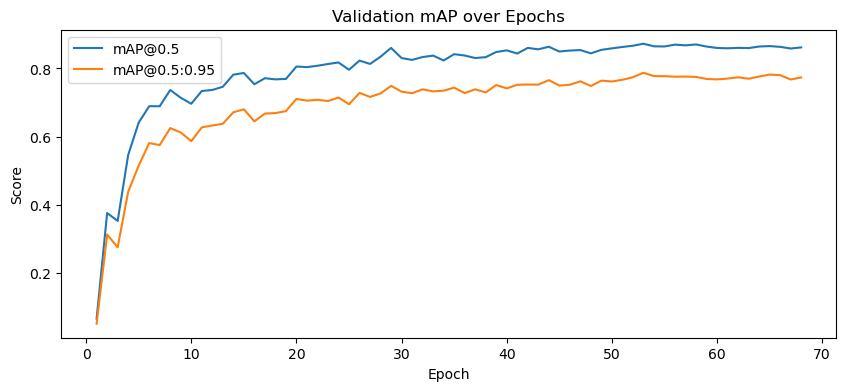

In [4]:
metrics = model.val(data="dataset_FULL\YOLO_COCO\data.yaml", split="test")
metrics

results = model.predict(
    source="C:/Users/matth/Desktop/CV_Assignment/dataset_FULL/YOLO_COCO/images/test",
    conf=0.25,
    save=True
)

results_path = Path(r"runs\Object_Detector_YOLO12_PS\results.csv")
results_df = pd.read_csv(results_path)
results_df.tail()


plt.figure(figsize=(10,4))
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation mAP over Epochs")
plt.legend()
plt.show()

In [ ]:
PRED_DIR = Path("runs/detect/predict6")
images = sorted(PRED_DIR.glob("*.jpg"))
print(f"Found {len(images)} predicted images")

if len(images) == 0:
    raise ValueError("No predicted images found.")

# --------------------
# Grid layout
# --------------------
cols = 5
rows = math.ceil(len(images) / cols)
fig_height = rows * 3.5

fig, axes = plt.subplots(rows, cols, figsize=(20, fig_height))
axes = axes.ravel()

for ax, img_path in zip(axes, images):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax.imshow(img)
    ax.set_title(img_path.name, fontsize=8)
    ax.axis("off")

# Hide unused axes
for ax in axes[len(images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Found 138 predicted images


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

# Load trained model
model = YOLO(r"C:\Users\matth\Desktop\CV_Assignment\runs\Object_Detector_YOLO12_PS\weights\best.pt")
# Run validation
metrics = model.val()

# Precision & Recall are per-class → take mean
precision = np.mean(metrics.box.p)
recall = np.mean(metrics.box.r)

# mAP metrics
map50 = metrics.box.map50
map5095 = metrics.box.map

# F1-score
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

# Inference time (ms per image)
inference_time_ms = metrics.speed["inference"]

# ---- Print results ----
print("YOLOv12 Evaluation Metrics")
print(f"Precision:      {precision:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"F1-score:       {f1:.4f}")
print(f"mAP@50:         {map50:.4f}")
print(f"mAP@50–95:      {map5095:.4f}")
print(f"Inference (ms): {inference_time_ms:.2f}")


Ultralytics 8.3.253  Python-3.10.19 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLOv12n summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2667.5665.7 MB/s, size: 1851.1 KB)
val: Scanning C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\labels\val.cache... 133 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 133/133  0.0s
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\val\20251112_124643.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\val\20251130_115108.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\val\20251130_115453.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YOLO_COCO\images\val\20251130_115532.jpg: corrupt JPEG restored and saved
val: C:\Users\matth\Desktop\CV_Assignment\dataset_FULL\YO